In [10]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [46]:
# Open every image in raw_imgs
paths = [f'Project_MLSP/Data/sub-TELL01{str(i).zfill(2)}_T1w_brain_homog_mni.nii.gz' for i in range(1,11)]
raw_imgs = np.array([nib.load(path).get_fdata() for path in paths])

In [68]:
raw_imgs.shape

(10, 182, 218, 182)

In [47]:
# Normalization
imgs = (raw_imgs - raw_imgs.min()) / (raw_imgs.max() - raw_imgs.min())

In [60]:
# Add noise to get 3T
sigma = 0.05
imgs_3T = imgs + np.random.normal(0, sigma, size=imgs.shape)

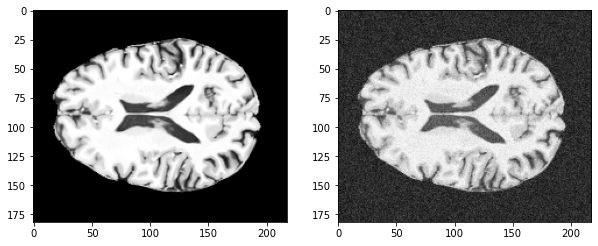

In [65]:
# Look at the images
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,12))
ax1.imshow(imgs[0,:,:,90], cmap='Greys_r')
ax2.imshow(imgs_3T[0,:,:,90], cmap='Greys_r')

In [161]:
from skimage.exposure import match_histograms  # hop

Text(0.5, 1.0, 'Output')

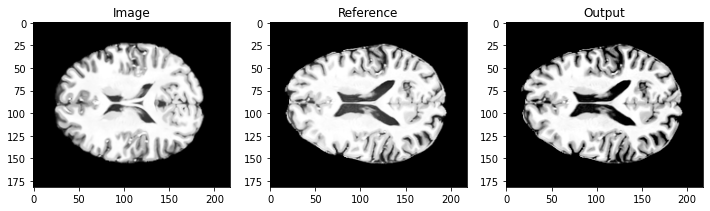

In [172]:
# Look at the images 
out = match_histograms(imgs[1], imgs[0])

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,8))
ax1.imshow(imgs[1,:,:,90], cmap='Greys_r')
ax1.set_title('Image')
ax2.imshow(imgs[0,:,:,90], cmap='Greys_r')
ax2.set_title('Reference')
ax3.imshow(out[:,:,90], cmap='Greys_r')
ax3.set_title('Output')

In [174]:
# Histogram matching 7T
for i in range(1, len(imgs)):
    imgs[i] = match_histograms(imgs[i], imgs[0])

In [175]:
# Histogram matching 3T
for i in range(1, len(imgs)):
    imgs[i] = match_histograms(imgs_3T[i], imgs_3T[0])